In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...
remote: Enumerating objects: 15836, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15836 (delta 0), reused 3 (delta 0), pack-reused 15831
Receiving objects: 100% (15836/15836), 14.42 MiB | 33.04 MiB/s, done.
Resolving deltas: 100% (10874/10874), done.


In [3]:
 # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (CPU)


In [7]:
!python /content/yolov5/train.py --img 416 --batch 16 --epochs 20 --data /content/yolov5/data/train_yolo.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/train_yolo.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-174-g5eb7f7d Python-3.10.11 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

In [18]:
!python detect.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --img 416 --source /content/drive/MyDrive/Object_detection/valid/images/HUY132_jpg.rf.54b6f9454a9965e38556e6210a2adbd8.jpg

detect: weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/Object_detection/valid/images/HUY132_jpg.rf.54b6f9454a9965e38556e6210a2adbd8.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-174-g5eb7f7d Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7074853 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 /content/drive/MyDrive/Object_detection/valid/images/HUY132_jpg.rf.54b6f9454a9965e38556e6210a2adbd8.jpg: 416x416 1 3, 3 4s, 1 5, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 120.7ms
Speed: 0.8ms pre-process, 120.7ms inference, 0.9ms NMS per image at shape (1, 3, 416, 

YOLOv5 🚀 v7.0-174-g5eb7f7d Python-3.10.11 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/107.7 GB disk)


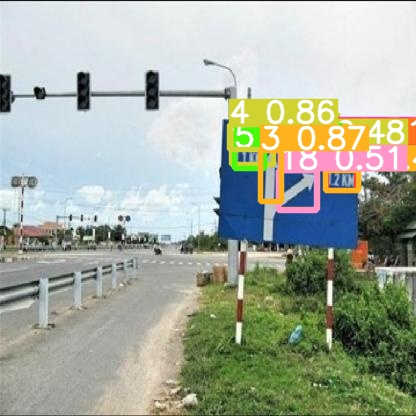

In [20]:
import utils
display = utils.notebook_init() 
display.Image(filename='/content/yolov5/runs/detect/exp/HUY132_jpg.rf.54b6f9454a9965e38556e6210a2adbd8.jpg', width=410)

In [21]:
!python detect.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --img 416 --source /content/drive/MyDrive/Object_detection/sign_test.jpg

detect: weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/Object_detection/sign_test.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-174-g5eb7f7d Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7074853 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 /content/drive/MyDrive/Object_detection/sign_test.jpg: 416x416 2 0s, 2 1s, 1 3, 1 4, 117.5ms
Speed: 0.9ms pre-process, 117.5ms inference, 1.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp2


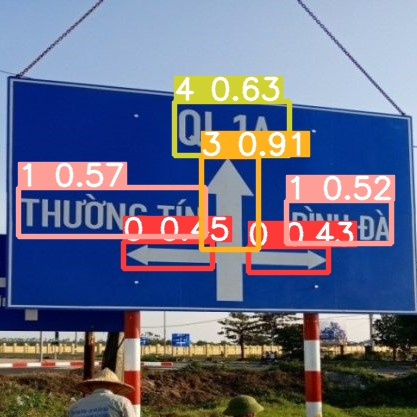

In [23]:
#Check with image outside validation set
display.Image(filename='/content/yolov5/runs/detect/exp2/sign_test.jpg', width=410)

In [10]:
!python export.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-174-g5eb7f7d Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7074853 parameters, 0 gradients, 16.0 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/exp4/weights/best.pt with output shape (1, 25200, 29) (13.8 MB)

TorchScript: starting export with torch 2.0.1+cu118...
TorchScript: export success ✅ 2.3s, saved as /content/yolov5/runs/train/exp4/weights/best.torchscript (27.4 MB)
requirements: Ultralytics requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.de